In [423]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [424]:
upload=files.upload()

Saving Fraud_check.csv to Fraud_check (2).csv


# New Section

In [425]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [426]:
data1=data.copy

**Performing EDA**

**Converting the tax income to 0 and 1,i.e if tax income<=30000-->0 else 1**

**0-->Risky**

**1-->Good**

In [427]:
data['Taxable.Income'] = np.where( data['Taxable.Income'] <= 30000, 0,1)

In [428]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [429]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

<Axes: xlabel='Taxable.Income', ylabel='count'>

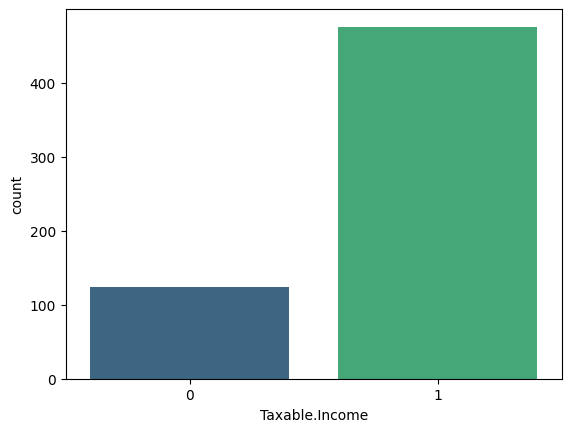

In [430]:
sns.countplot(x=data['Taxable.Income'],palette='viridis')

In [431]:
data=pd.get_dummies(data,columns=['Undergrad','Urban','Marital.Status'])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,1,50047,10,1,0,0,1,0,0,1
1,1,134075,18,0,1,0,1,1,0,0
2,1,160205,30,1,0,0,1,0,1,0
3,1,193264,15,0,1,0,1,0,0,1
4,1,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,0,1,1,0,0
596,1,55369,2,0,1,0,1,1,0,0
597,1,154058,0,1,0,0,1,1,0,0
598,1,180083,17,0,1,1,0,0,1,0


<ipython-input-432-946844e4f3c9>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Taxable.Income', ylabel='Density'>

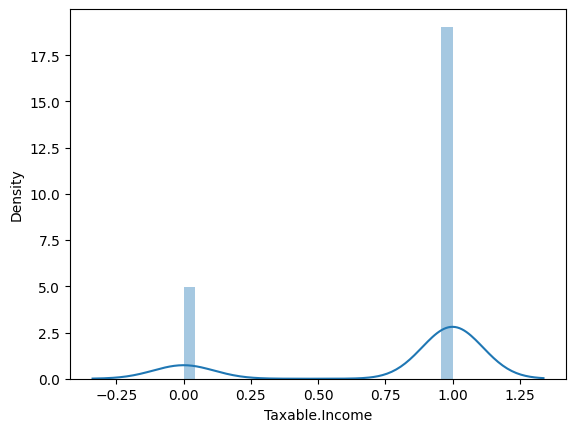

In [432]:
sns.distplot(data['Taxable.Income'])

In [433]:
data


,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,1,50047,10,1,0,0,1,0,0,1
1,1,134075,18,0,1,0,1,1,0,0
2,1,160205,30,1,0,0,1,0,1,0
3,1,193264,15,0,1,0,1,0,0,1
4,1,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,0,1,1,0,0
596,1,55369,2,0,1,0,1,1,0,0
597,1,154058,0,1,0,0,1,1,0,0
598,1,180083,17,0,1,1,0,0,1,0


In [434]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [435]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [436]:
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [437]:
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [438]:
y_pred=model_entropy.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [439]:
y_pred_df=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
y_pred_df

,Actual,Predictions
312,1,1
361,1,1
363,0,1
77,1,1
433,0,1
...,...,...
2,1,1
366,1,1
149,1,1
74,1,1


In [440]:
accuracy_entropy=accuracy_score(y_test,y_pred)
accuracy_entropy

0.75

In [441]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [442]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [443]:
y_pred=model_gini.predict(x_test)

In [444]:
accuracy_score(y_test,y_pred)

0.7416666666666667

In [445]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

# **Applying Normalization-->MinMaxScaler**

In [446]:
data1=pd.read_csv('Fraud_check.csv')
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [447]:
data1['Taxable.Income'] = np.where( data1['Taxable.Income'] <= 30000, 0,1)

In [448]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [449]:
data2=pd.get_dummies(data1,columns=['Undergrad','Urban','Marital.Status'])
data2

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,1,50047,10,1,0,0,1,0,0,1
1,1,134075,18,0,1,0,1,1,0,0
2,1,160205,30,1,0,0,1,0,1,0
3,1,193264,15,0,1,0,1,0,0,1
4,1,27533,28,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,0,1,1,0,0
596,1,55369,2,0,1,0,1,1,0,0
597,1,154058,0,1,0,0,1,1,0,0
598,1,180083,17,0,1,1,0,0,1,0


In [450]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [469]:
data2=norm_func(data2)


In [452]:
x=data2.iloc[:,1:]
y=data2.iloc[:,0]
x


,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Urban_NO,Urban_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0.139472,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.962563,0.500000,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,0.0,1.0,1.0,0.0,0.0
596,0.170058,0.066667,0.0,1.0,0.0,1.0,1.0,0.0,0.0
597,0.737240,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0
598,0.886810,0.566667,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [453]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [454]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [455]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'x[1] <= 0.817\nentropy = 0.738\nsamples = 480\nvalue = [100, 380]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 0.583\nentropy = 0.775\nsamples = 368\nvalue = [84, 284]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 0.989\nentropy = 0.723\nsamples = 274\nvalue = [55, 219]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.712\nsamples = 272\nvalue = [53, 219]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.375, 'x[4] <= 0.5\nentropy = 0.891\nsamples = 94\nvalue = [29, 65]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.976\nsamples = 49\nvalue = [20, 29]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.722\nsamples = 45\nvalue = [9, 36]'),
 Text(0.75, 0.625, 'x[1] <= 0.85\nentropy = 0.592\nsamples = 112\nvalue = [16, 96]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 0.228\nentropy = 0.65\nsamples = 96\nvalue = [16, 80]'),
 Text(0.75, 0.125, 

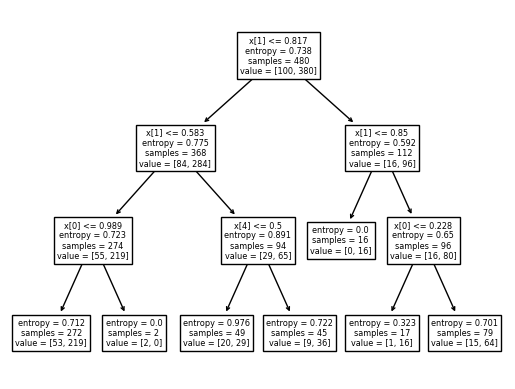

In [456]:
tree.plot_tree(model)

In [457]:
y_pred=model.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [458]:
y_pred_df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
y_pred_df

,Actual,Prediction
356,0.0,1.0
435,1.0,1.0
81,1.0,1.0
302,1.0,1.0
214,1.0,1.0
...,...,...
578,1.0,1.0
543,1.0,1.0
29,1.0,1.0
519,1.0,1.0


In [459]:
np.mean(y_test==y_pred)

0.8

In [460]:
entropy_accuracy_norm=accuracy_score(y_test,y_pred)
entropy_accuracy_norm

0.8

In [461]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [462]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [463]:
y_pred=model_gini.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [464]:
data=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
data

,Actual,Predictions
356,0.0,1.0
435,1.0,1.0
81,1.0,1.0
302,1.0,1.0
214,1.0,1.0
...,...,...
578,1.0,1.0
543,1.0,1.0
29,1.0,1.0
519,1.0,1.0


In [465]:
accuracy_gini_norm=accuracy_score(y_test,y_pred)
accuracy_gini_norm*100


80.0

In [466]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.8

In [467]:
import plotly.express as px
x=['model_entropy_norm','accuracy_entropy','accuracy_logistic']
y=[entropy_accuracy_norm,accuracy_entropy,accuracy_logistic]
fig=px.bar(x=x,y=y,title='Models vs Accuaracy_Score',labels={'x':'Models','y':'Accuaracy_Score'})
fig.show()